In [27]:
import tensorflow as tf
import os
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

In [2]:
IMG_SIZE = (200, 200)
BATCH_SIZE = 32

In [3]:
print(os.getcwd())

D:\Ineuron materials FSDS\Deep Learning\vagetable-classification\notebook


In [4]:
data_path = r'D:\Ineuron materials FSDS\Deep Learning\vagetable-classification\data'
PARENT_DIR = os.path.join(data_path,'Vegetable Images')
print(PARENT_DIR)

D:\Ineuron materials FSDS\Deep Learning\vagetable-classification\data\Vegetable Images


In [5]:
train_dir = r'D:\Ineuron materials FSDS\Deep Learning\vagetable-classification\data\Vegetable Images\train'
test_dir = r'D:\Ineuron materials FSDS\Deep Learning\vagetable-classification\data\Vegetable Images\test'
validation_dir = r'D:\Ineuron materials FSDS\Deep Learning\vagetable-classification\data\Vegetable Images\validation'

In [6]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0/255)


In [7]:
batch_size = 32

In [8]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Set the desired image size
    batch_size=batch_size,
    class_mode='categorical'  # Use 'categorical' for multi-class classification
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


In [31]:
class_map = dict([(v,k) for k,v in train_generator.class_indices.items()])
class_map

{0: 'Bean',
 1: 'Bitter_Gourd',
 2: 'Bottle_Gourd',
 3: 'Brinjal',
 4: 'Broccoli',
 5: 'Cabbage',
 6: 'Capsicum',
 7: 'Carrot',
 8: 'Cauliflower',
 9: 'Cucumber',
 10: 'Papaya',
 11: 'Potato',
 12: 'Pumpkin',
 13: 'Radish',
 14: 'Tomato'}

In [10]:
model = Sequential()

In [11]:
model.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=[200, 200, 3]))
model.add(MaxPool2D(2, ))
model.add(Dropout(0.3))

model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(2, ))
model.add(Dropout(0.3))

model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(2, ))
model.add(Dropout(0.3))

model.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(2, ))
model.add(Dropout(0.3))

model.add(Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(2, ))
model.add(Dropout(0.3))

model.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(2, ))
model.add(Dropout(0.3))

##################################################################################3

model.add(Flatten())

# Add the fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dense(15, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 100, 100, 16)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 100, 100, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 50, 50, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 50, 50, 32)        0

In [13]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5) # Set up callbacks
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics='accuracy')


In [16]:
hist = model.fit(train_generator, 
                 epochs=1, 
                 verbose=1, 
                 validation_data=validation_generator, 
                 steps_per_epoch = 15000//32, 
                 validation_steps = 3000//32, 
                 callbacks=early_stopping)

468/468 [==============================] - 963s 2s/step - loss: 2.3136 - accuracy: 0.1739 - val_loss: 1.9064 - val_accuracy: 0.3471


In [20]:
# Plot the error and accuracy
h = hist.history
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(h['loss'], c='red', label='Training Loss')
plt.plot(h['val_loss'], c='red', linestyle='--', label='Validation Loss')
plt.plot(h['accuracy'], c='blue', label='Training Accuracy')
plt.plot(h['val_accuracy'], c='blue', linestyle='--', label='Validation Accuracy')
plt.xlabel("Number of Epochs")
plt.legend(loc='best')
plt.show()

TypeError: 'History' object is not subscriptable

<Figure size 1000x500 with 0 Axes>

In [21]:
# Predict the accuracy for the test set
model.evaluate(test_generator)

94/94 [==============================] - 74s 794ms/step - loss: 1.8962 - accuracy: 0.3417


[1.8961567878723145, 0.34166666865348816]

1/1 [==============================] - 0s 42ms/step
4


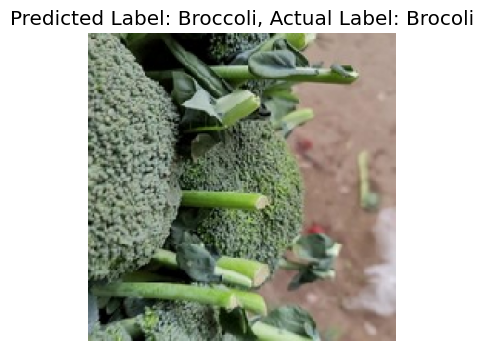

In [32]:

# Testing the Model
test_image_path = r'D:\Ineuron materials FSDS\Deep Learning\vagetable-classification\data\Vegetable Images\test\Broccoli\1011.jpg'

def generate_predictions(test_image_path, actual_label):
    
    # 1. Load and preprocess the image
    test_img = image.load_img(test_image_path, target_size=(200, 200))
    test_img_arr = image.img_to_array(test_img)/255.0
    test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1], test_img_arr.shape[2]))

    # 2. Make Predictions
    predicted_label = np.argmax(model.predict(test_img_input))
    print(predicted_label)
    predicted_vegetable = class_map[predicted_label]
    plt.figure(figsize=(4, 4))
    plt.imshow(test_img_arr)
    plt.title("Predicted Label: {}, Actual Label: {}".format(predicted_vegetable, actual_label))
    plt.grid()
    plt.axis('off')
    plt.show()

# call the function
generate_predictions(test_image_path, actual_label='Brocoli')



In [33]:
model.save("veh.h5")

C:\Users\NABEEL\Anaconda3\envs\DLNLP\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
